**Importing Libaries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Correcting the desicion coloumn in required csv**

In [2]:


# Load the CSV file
df = pd.read_csv("B:\OneDrive - Amity University\Desktop\Infosys\Assignment\Infy_EDA_Feature Engineering_insights.csv")

# Normalize the 'decision' column
df['decision'] = df['decision'].apply(lambda x: 1 if str(x).lower() in ['select', 'selected','Select'] else 0)

# Save the updated DataFrame back to a new CSV file
df.to_csv('updated_file.csv', index=False)  # Replace 'updated_file.csv' with the desired output file name

print("Updated CSV saved successfully!")


Updated CSV saved successfully!


In [3]:
c1 = 'B:/OneDrive - Amity University/Desktop/Infosys/Assignment-2/updated_file.csv'


In [4]:
df = pd.read_csv(c1)
df = pd.DataFrame(df)
print(df)


              ID            Name                Role  \
0      brenbr359     brent brown     product manager   
1      jameay305     james ayala   software engineer   
2      scotri565    scott rivera       data engineer   
3      emilke232     emily kelly         ui engineer   
4      ashlra638      ashley ray      data scientist   
...          ...             ...                 ...   
3169  KotaSai196    Mahin Tiwari  Software Developer   
3170  KotaSai197   Yashika Gupta  Software Developer   
3171  KotaSai198  Rachna Rathore  Software Developer   
3172  KotaSai199      Janki Garg  Software Developer   
3173  KotaSai200    Viral Chopra     Project Manager   

                                             Transcript  \
0     product manager interview transcript\n\ninterv...   
1     software engineer interview transcript\n\ninte...   
2     here is a simulated interview for scott rivera...   
3     interview transcript: emily kelly for ui engin...   
4     data scientist interview t

In [5]:
df.shape

(3174, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 34 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [7]:
df.isnull().sum()*100/df.shape[0]


ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [8]:

X = df[['Transcript Sentiment','Similarity Score','Transcript Length','Resume Length','Role_encoded','Transcript_Word_Count','Resume_Word_Count','Resume_Sentiment','SVD_Feature_1','SVD_Feature_2','SVD_Feature_3','SVD_Feature_4','SVD_Feature_5']]
y = df['decision']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 41)


***Linear Regression***

In [11]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

from sklearn.metrics import mean_absolute_percentage_error

y_test_filtered = y_test[y_test > 0]
y_pred_filtered = y_pred[y_test > 0]
mape = mean_absolute_percentage_error(y_test_filtered, y_pred_filtered)
accuracy = 1 - mape
print(f'Accuracy: {accuracy * 100:.2f}%')



Mean Squared Error: 0.17252117297540787
R-squared: 0.3073023920796525
Accuracy: 63.61%


**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=42)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
y_prob_log = log_reg.predict_proba(x_test)

# Metrics
accuracy_log = accuracy_score(y_test, y_pred_log) * 100
loss_log = log_loss(y_test, y_prob_log)

print(f"Logistic Regression - Accuracy: {accuracy_log:.2f}%, Loss: {loss_log:.4f}")


Logistic Regression - Accuracy: 72.91%, Loss: 0.5134


C:\Users\sidhe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_prob_dt = dt_model.predict_proba(x_test)

# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
loss_dt = log_loss(y_test, y_prob_dt)

print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}%, Loss: {loss_dt:.4f}")


Decision Tree - Accuracy: 75.59%, Loss: 8.7981


**Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_prob_rf = rf_model.predict_proba(x_test)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
loss_rf = log_loss(y_test, y_prob_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}%, Loss: {loss_rf:.4f}")


Random Forest - Accuracy: 81.10%, Loss: 0.3892


**XGBoost**

In [15]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
y_prob_xgb = xgb_model.predict_proba(x_test)

# Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
loss_xgb = log_loss(y_test, y_prob_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.2f}%, Loss: {loss_xgb:.4f}")


C:\Users\sidhe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:37:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 79.37%, Loss: 0.4580


***Post Best Model Analysis - Random Forest***

**Feature Importance Analysis**

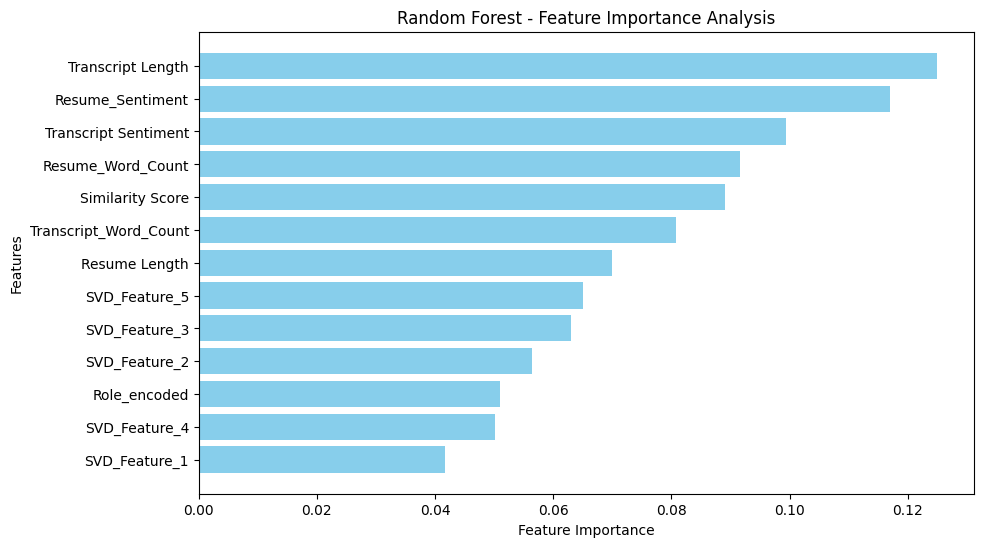

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': x_train.columns if hasattr(x_train, 'columns') else range(x_train.shape[1]),
    'Importance': rf_model.feature_importances_  # Use rf_model here
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance Analysis')
plt.gca().invert_yaxis()
plt.show()


**Confusion Matrix**

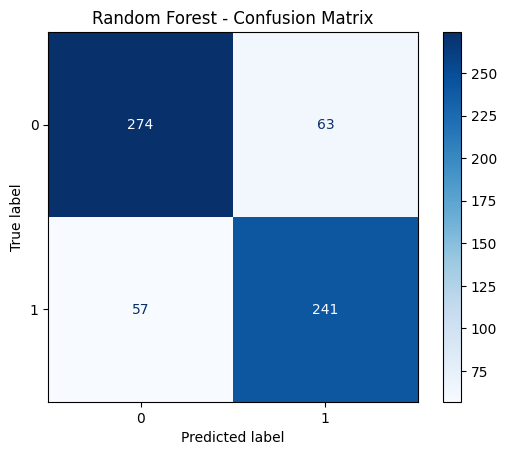

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest - Confusion Matrix')
plt.show()


**Error Analysis**

In [25]:
print(type(y_test))  # This should print <class 'pandas.core.series.Series'> or <class 'numpy.ndarray'>


<class 'pandas.core.series.Series'>


In [26]:
import numpy as np

# Misclassified Examples
misclassified_indices = np.where(y_test != y_pred_rf)[0]
print(f"Number of Misclassified Examples: {len(misclassified_indices)}")
print("Example Misclassified Indices:", misclassified_indices[:5])

# If you have access to features
print("Sample Misclassified Example Features:")
print(x_test.iloc[misclassified_indices[:1]])  # Assuming X_test is a DataFrame
print("True Label:", y_test.iloc[misclassified_indices[0]])  # If y_test is a Pandas Series
print("Predicted Label:", y_pred_rf[misclassified_indices[0]])  # Assuming y_pred_rf is a list or array



Number of Misclassified Examples: 120
Example Misclassified Indices: [ 2  8 12 16 17]
Sample Misclassified Example Features:
      Transcript Sentiment  Similarity Score  Transcript Length  \
2204                0.9978          0.149156               2783   

      Resume Length  Role_encoded  Transcript_Word_Count  Resume_Word_Count  \
2204           2475            20                    469                327   

      Resume_Sentiment  SVD_Feature_1  SVD_Feature_2  SVD_Feature_3  \
2204            0.9516       0.619063      -0.434941       0.421017   

      SVD_Feature_4  SVD_Feature_5  
2204      -0.079505       0.181638  
True Label: 1
Predicted Label: 0


**Cross-validation on Random Forest**

In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-validation Scores: [0.82480315 0.81299213 0.81496063 0.82086614 0.79092702]
Mean CV Accuracy: 81.29%


**ROC-AUC Curve**

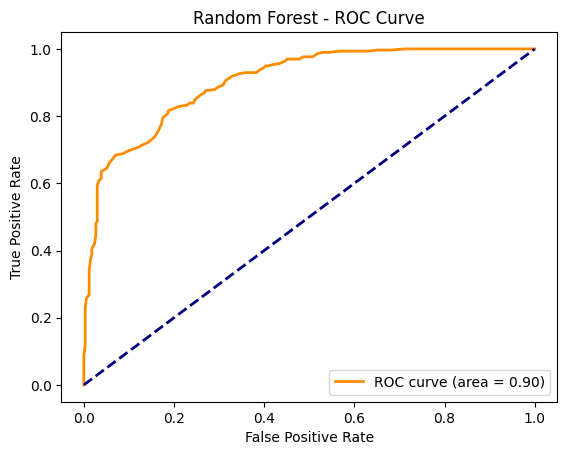

In [35]:
from sklearn.metrics import roc_curve, auc

y_prob_rf = rf_model.predict_proba(x_test)[:, 1]  # Assuming binary classification
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Partial Dependence Plots (PDP)**

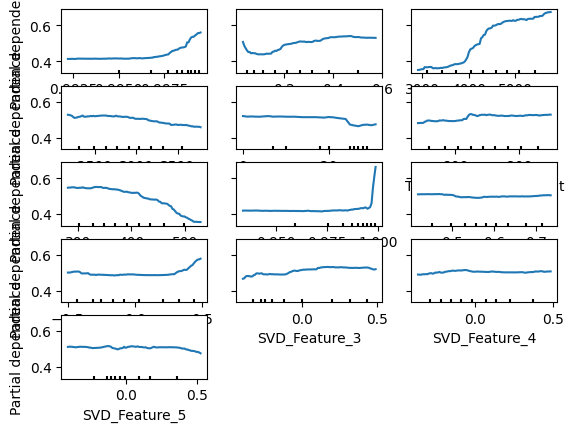

In [40]:
from sklearn.inspection import PartialDependenceDisplay

# PDP for Features (e.g., feature indices 0 and 1)
PartialDependenceDisplay.from_estimator(rf_model, x_train, features=[0, 1,2,3,4,5,6,7,8,9,10,11,12], kind="average")
plt.show()


**THANK YOU!**